<a href="https://colab.research.google.com/github/dhruv197/Play-Store-App-Review-Analysis/blob/main/EDA_PROJECT_Dhruv_Taneja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name -** Play Store App Review Analysis

*   List item

*   List item
*   List item


*   List item



Project Type - EDA

Contribution - Individual

Team Member 1 - Dhruv Taneja

# **Project Summary -**
The increasing use of mobile devices and applications has led to a growing need for understanding user behavior and preferences. Play Store app review analysis is an effective way of gaining insights into user satisfaction levels, identifying patterns and trends, and improving the overall user experience.

 The aim of this project is to analyze the reviews of popular apps on the Play Store and draw insights from the data that will be helpful in making informed decisions for organizations looking to launch new apps in the market.


# **GitHub Link -**

# **Problem Statement**

With millions of apps available on the Play Store, it can be challenging for users to decide which app to download and use. App reviews play a critical role in providing insights into the user experience, but analyzing them manually can be time-consuming and error-prone. Therefore, the aim of this project is to automate the process of analyzing app reviews on the Play Store using data science techniques. The project will focus on developing a methodology to collect, clean, and analyze app reviews to uncover hidden insights that can help organizations make informed decisions about launching new apps in the market. The main objective of this project is to provide a comprehensive analysis of app reviews and draw insights that can be used to improve the overall user experience and increase user satisfaction.

#### **Define Your Business Objective?**

To uncover hidden insights in the Play Store app data and user reviews, and provide organizations with the maximum amount of information possible to make informed decisions about launching new apps and improving the user experience.

## ***1. Know Your Data***

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

### Dataset Loading

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Reading the data and storing it in variable
play_store_df = pd.read_csv('/content/drive/MyDrive/alma_better/capstone_project1/Play Store Data.csv')

### Dataset First View

In [4]:
play_store_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### Dataset Rows & Columns count

In [5]:
play_store_df.shape

(10841, 13)

### Dataset Information

In [6]:
play_store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
len(play_store_df[play_store_df.duplicated()])

483

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
print(play_store_df.isnull().sum())

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


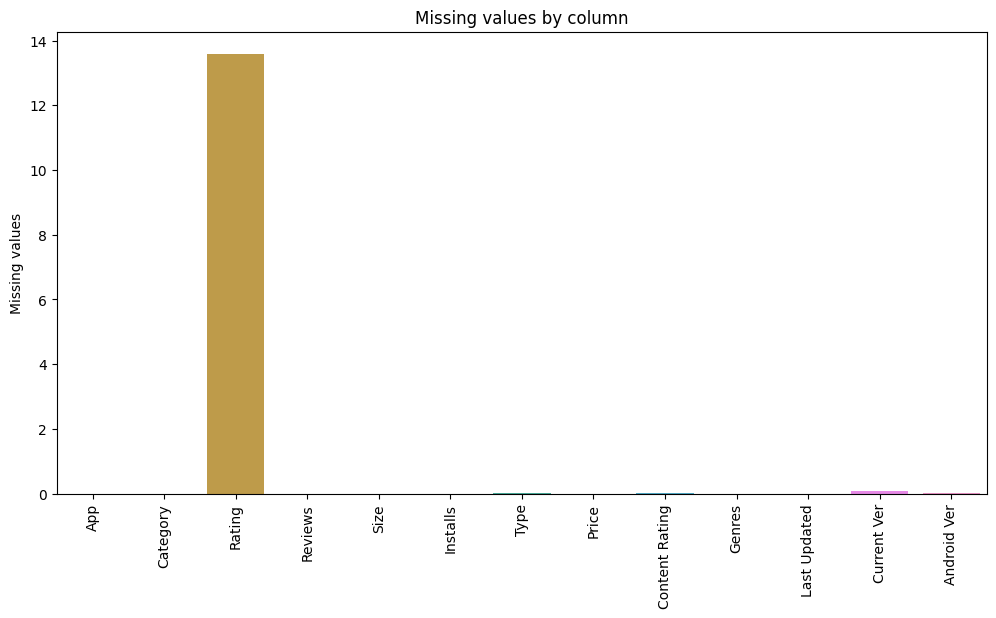

In [9]:
# Calculate the missing values in each column
missing_vals = play_store_df.isna().mean() * 100

# Create a bar chart of the missing values
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_vals.index, y=missing_vals.values)
plt.xticks(rotation=90)
plt.ylabel('Missing values')
plt.title('Missing values by column')
plt.show()

### What did you know about your dataset?

We have two datasets, one containing Play Store data and another containing user reviews. The Play Store dataset has data about app names, categories, ratings, reviews, installs, prices, content ratings, genres etc. The user review dataset includes information about app names, translated reviews, sentiment polarity and subjectivity, and other details. By exploring and analyzing these datasets, we can gain insights into user behavior, preferences, and sentiment, which can help organizations make informed decisions about launching new apps and improving the user experience.

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
play_store_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [11]:
# Dataset Describe
play_store_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


### Variables Description 

Play Store Dataset:

App: The name of the app.

Category: The category of the app (e.g., games, social, productivity).

Rating: The user rating of the app (on a scale of 1 to 5).

Reviews: The number of user reviews for the app.

Size: The size of the app in megabytes.

Installs: The number of user downloads for the app.

Type: Whether the app is free or paid.

Price: The price of the app (if it is a paid app).

Content Rating: The content rating of the app (e.g., everyone, teen, mature).

Genres: The genre(s) of the app.

Last Updated: The date when the app was last updated.

Current Ver: The current version of the app.

Android Ver: The required Android version for the app.

### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
# Loop through each column in the dataset and print the unique values
for col in play_store_df.columns:
    print("No. of unique values in ",col,"is",play_store_df[col].nunique(),".")

No. of unique values in  App is 9660 .
No. of unique values in  Category is 34 .
No. of unique values in  Rating is 40 .
No. of unique values in  Reviews is 6002 .
No. of unique values in  Size is 462 .
No. of unique values in  Installs is 22 .
No. of unique values in  Type is 3 .
No. of unique values in  Price is 93 .
No. of unique values in  Content Rating is 6 .
No. of unique values in  Genres is 120 .
No. of unique values in  Last Updated is 1378 .
No. of unique values in  Current Ver is 2832 .
No. of unique values in  Android Ver is 33 .


##Data Wrangling

*As ratings is based on the experience of each user, it may not be appropriate to fill NaN values with the median or mode. Therefore, I have decided to drop any rows with missing data

In [13]:
play_store_df.dropna(inplace = True)

In [14]:
play_store_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

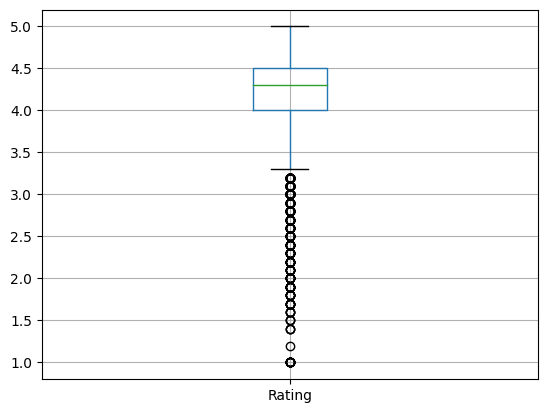

In [15]:
# Check for the outliers
play_store_df.boxplot();

In [16]:
# Convert the data type of columns that has numeric values as string 
play_store_df['Reviews'] = play_store_df['Reviews'].astype(int)

In [17]:
#Lets create a function to convert the data of size in MB and return the value as float 
def kb_to_mb_convertor(size):
  if size[-1]=='k':
    return float(size[:-1])/1000
  elif size[-1]=='M':
    return float(size[:-1])
  else:
    return np.nan

In [18]:
play_store_df['Size'] = play_store_df['Size'].apply(kb_to_mb_convertor)

In [19]:
# Now lets fill nan with median in Size column
play_store_df['Size'].fillna(play_store_df['Size'].median(),inplace = True)

In [20]:
# Revome unwanted characters like '+',',' from Installs column and convert it into float data type
play_store_df['Installs']= play_store_df['Installs'].astype(str).str.replace('+','',regex = False).str.replace(',','',regex = False).astype(float)

In [21]:
# Remove "$" sign from from price also and convert it into float type
play_store_df['Price'] = play_store_df['Price'].astype(str).str.replace('$','',regex = False).astype(float)

In [22]:
#Lets check for the duplicate rows
play_store_df.duplicated().sum()

474

In [23]:
#Lets remove the duplicate rows
play_store_df.drop_duplicates(inplace = True)

In [24]:
# Lets check our cleaned DataFrame
play_store_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6,500.0,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000.0,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100.0,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,14.0,1000.0,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [25]:
# Group the DataFrame as per the category 
Category_group_df = play_store_df.groupby(['Category']).agg({'App':'count','Installs':'sum','Rating':'mean','Reviews':'sum'})\
.rename({'App':'Total_Apps','Rating':'Avg_Ratings'}, axis = 1).reset_index()
Category_group_df

,Category,Total_Apps,Installs,Avg_Ratings,Reviews
0,ART_AND_DESIGN,61,1.242281e+08,4.377049,1714317
1,AUTO_AND_VEHICLES,73,5.312980e+07,4.190411,1163630
2,BEAUTY,42,2.691620e+07,4.278571,395133
3,BOOKS_AND_REFERENCE,177,1.916292e+09,4.347458,21872818
4,BUSINESS,270,8.635181e+08,4.102593,12357705
5,COMICS,58,5.603610e+07,4.155172,3381945
6,COMMUNICATION,307,2.415224e+10,4.151466,601273091
7,DATING,159,2.065224e+08,3.971698,5545164
8,EDUCATION,129,5.338520e+08,4.375969,23164724
9,ENTERTAINMENT,111,2.455660e+09,4.136036,47570716


In [26]:
 # Sort the DataFrame to get some important insights

max_apps_category_df = Category_group_df.sort_values(by='Total_Apps', ascending=False).reset_index()
max_apps_category = max_apps_category_df.loc[0, 'Category']
print(f"The category with maximum number of apps is {max_apps_category} with a total of {max_apps_category_df.loc[0, 'Total_Apps']} Apps")

most_popular_category_df = Category_group_df.sort_values(by='Installs', ascending=False).reset_index()
most_popular_category = most_popular_category_df.loc[0, 'Category']
print(f"The most popular category is {most_popular_category} with a total of {most_popular_category_df.loc[0, 'Installs']} installs")

best_rated_category_df = Category_group_df.sort_values(by='Avg_Ratings', ascending=False).reset_index()
best_rated_category = best_rated_category_df.loc[0, 'Category']
print(f"The best rated category is {best_rated_category} with ratings of {round(best_rated_category_df.loc[0,'Avg_Ratings'],2)}")

most_reviewed_category_df = Category_group_df.sort_values(by='Reviews', ascending=False).reset_index()
most_reviewed_category = most_reviewed_category_df.loc[0, 'Category']
print(f"The most reviewed category is {most_reviewed_category} with a total of {most_reviewed_category_df.loc[0,'Reviews']} reviews")

The category with maximum number of apps is FAMILY with a total of 1717 Apps
The most popular category is GAME with a total of 31543862717.0 installs
The best rated category is EVENTS with ratings of 4.44
The most reviewed category is GAME with a total of 1415533878 reviews


#What all manipulations have you done and insights you found?


#Manipulations:

*Dropped any rows with missing data using the dropna() function.

*Converted the data type of the Reviews column from string to integer using the astype() function.

*Created a function to convert the app size from kilobytes to megabytes and applied it to the Size column.

*Filled missing values in the Size column with the median using the fillna() function.

*Removed unwanted characters from the Installs column and converted it to a float data type using the str.replace() and astype() functions.

*Removed the dollar sign from the Price column and converted it to a float data type using the str.replace() and astype() functions.

*Dropped any duplicate rows using the drop_duplicates() function.

*Grouped the data by app category and aggregated the total number of apps, total number of installs, average rating, and total number of reviews using the groupby() and agg() functions.

*Sorted the data frame based on the total number of apps, total number of installs, average rating, and total number of reviews using the sort_values() function.

#Insights:

*The most common app category is Family, with a total of 1717 apps.

*The most popular category is Game, with a total of 31.54 billion installs.

*The best-rated category is Events with an average rating of 4.44.

*The most reviewed category is Game with a total of 1.42 billion reviews.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - Bar Plot of total numbers of app in each category

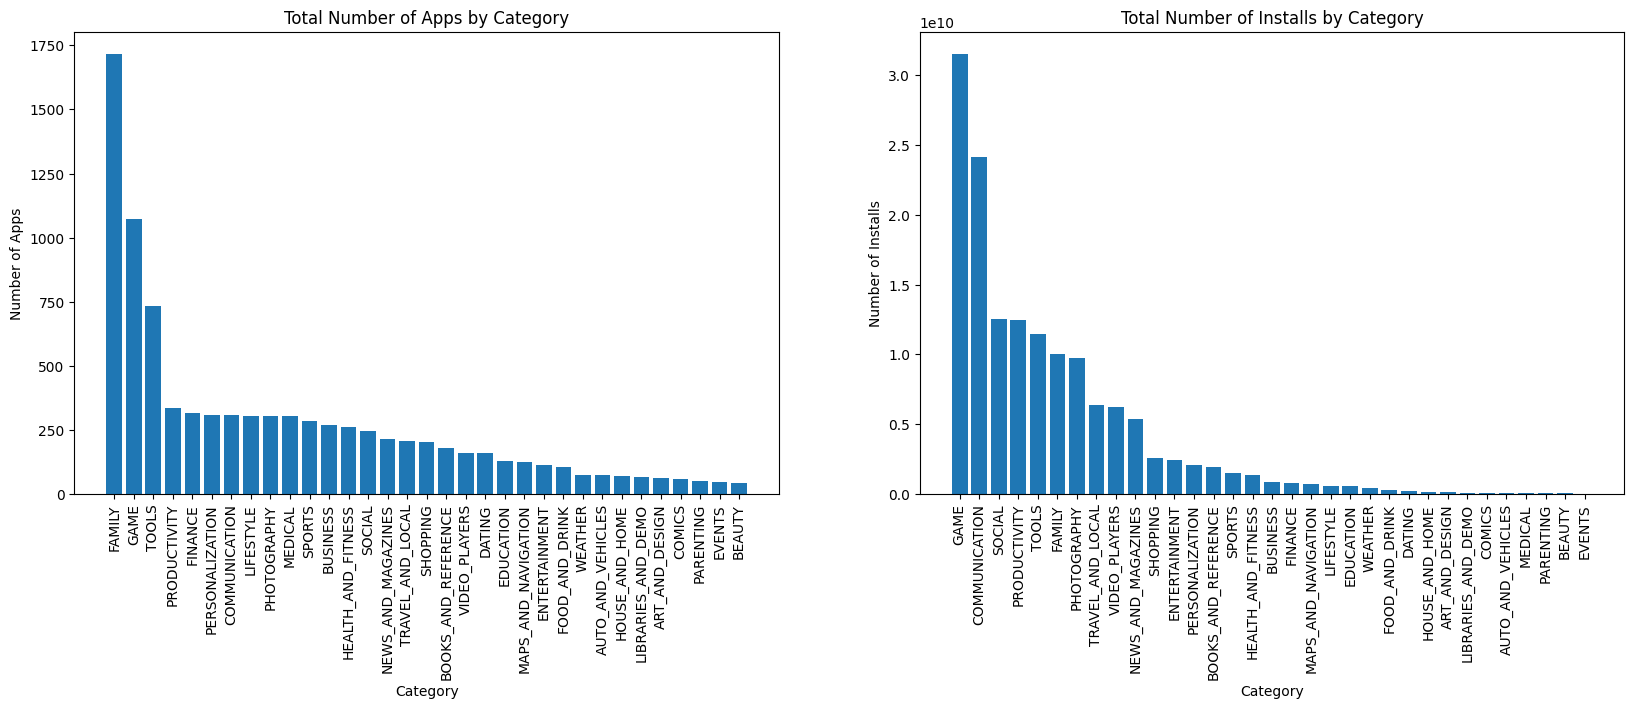

In [27]:
# Set the figure size
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 6))

# Create the first bar plot to visualize the number of apps in each category
ax1.bar(max_apps_category_df['Category'], max_apps_category_df['Total_Apps'])
ax1.set_title('Total Number of Apps by Category')
ax1.set_xlabel('Category')
ax1.set_ylabel('Number of Apps')
ax1.tick_params(axis='x', labelrotation=90)

# Create the second bar plot to visualize the number of installs in each category
ax2.bar(most_popular_category_df['Category'], most_popular_category_df['Installs'])
ax2.set_title('Total Number of Installs by Category')
ax2.set_xlabel('Category')
ax2.set_ylabel('Number of Installs')
ax2.tick_params(axis='x', labelrotation=90)

# Display the chart
plt.show()

##### 1. Why did you pick the specific chart?

The specific chart used is a bar chart that visualizes the total number of apps and total number of installs in each category. This chart was chosen because it effectively compares the number of apps and installs across different categories, allowing for easy identification of the most popular categories.

#####2. What is/are the insight(s) found from the chart?

The insights gained from the chart are as follows:

>Family is the most common category with the highest number of apps, while  Events and Beauty have the lowest.

>Game is the most popular category with the highest number of installs, while  Beauty and Events have the lowest.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.


The gained insights can have a positive business impact as they can help app developers and stakeholders identify the most popular categories and create apps that cater to the needs of the customers.

Game is the most popular category with the highest number of installs, despite having the second-highest number of apps. This suggests that there is a high demand for gaming apps on the Google Play Store, and app developers in the gaming industry may have a greater opportunity to reach a larger audience

However, there are no insights in this chart that lead to negative growth.

#### Chart - 2(Histogram)- Distribution of App Ratings 

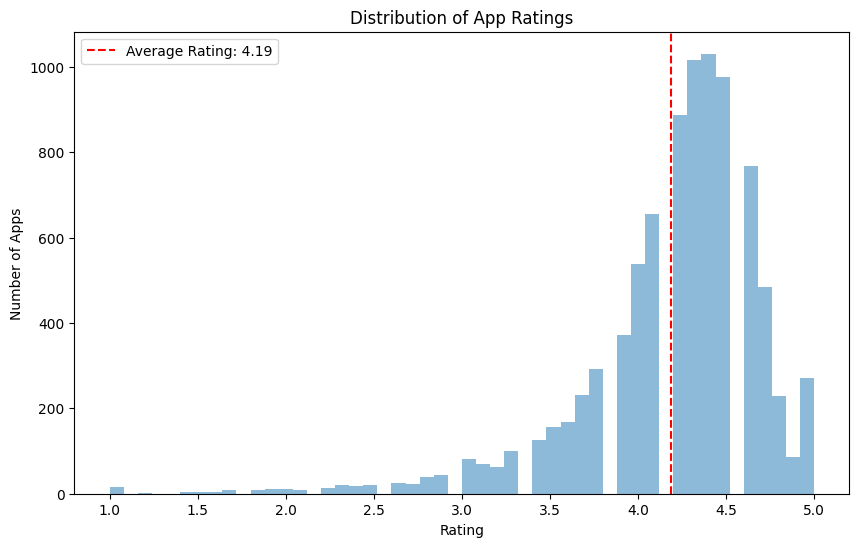

In [28]:
# Calculate the average rating for all apps
avg_rating = play_store_df['Rating'].mean()

# Create a histogram of app ratings with 50 bins
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(play_store_df['Rating'], bins=50, alpha=0.5)

# Add a vertical line representing the average rating
ax.axvline(avg_rating, color='red', linestyle='--', label=f'Average Rating: {avg_rating:.2f}')


# Set the title, labels, and legend for the chart
ax.set_title('Distribution of App Ratings')
ax.set_xlabel('Rating')
ax.set_ylabel('Number of Apps')
ax.legend()

# Display the chart
plt.show()

##### 1. Why did you pick the specific chart?

The specific chart used is a histogram that visualizes the distribution of app ratings. This chart was chosen because it provides a clear picture of how the app ratings are distributed across the entire dataset, allowing for easy identification of common app rating scores.

#####2. What is/are the insight(s) found from the chart?

The insights gained from the chart are as follows:

>The majority of apps have a rating between 4.0 and 4.5.

>The distribution of app ratings is slightly skewed to the left, indicating that there are more apps with higher ratings than lower ratings.

>The average rating for all apps is 4.19 stars, as shown by the red dashed line on the chart.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can help app developers and stakeholders understand the distribution of app ratings and the most common rating scores. This can help them improve their apps and create products that cater to the needs of their target audience. Additionally, the high number of apps with ratings above 4 stars suggests that there is a high standard for app quality among users, and app developers should strive to meet this standard in order to attract and retain customers. Overall, the insights gained from this chart can have a positive impact on business growth by helping app developers create high-quality products that meet the needs of their customers.

#### Chart - 3(Polar Chart)- Sum of Installs by Genre (Game Category)

In [29]:
game_genres_df = play_store_df[play_store_df['Category']=='GAME'].groupby('Genres')['Installs'].sum().sort_values(ascending = False)
game_genres_df.reset_index()

,Genres,Installs
0,Arcade,9.717078e+09
1,Action,8.336037e+09
2,Casual,5.949000e+09
3,Racing,2.000246e+09
4,Puzzle,1.073200e+09
5,Sports,1.016000e+09
6,Strategy,9.573000e+08
7,Adventure;Action & Adventure,5.000000e+08
8,Adventure,4.066953e+08
9,Music,2.701200e+08


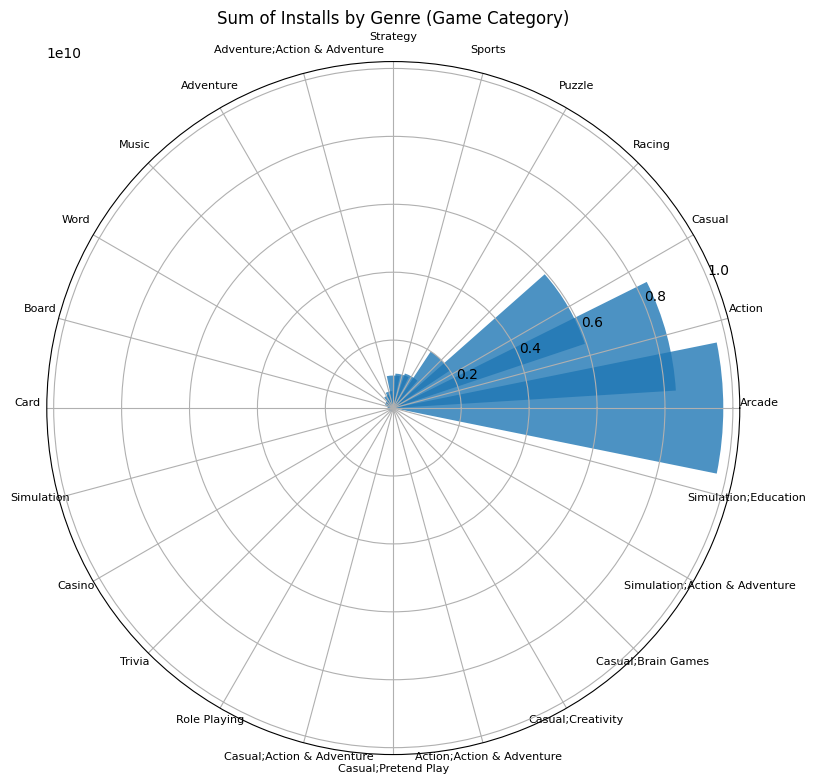

In [30]:
# Create polar chart
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
fig.set_size_inches(9, 9)
theta = [2 * i * np.pi / len(game_genres_df) for i in range(len(game_genres_df))]
radii = game_genres_df.values
ax.bar(theta, radii, width=0.4, alpha=0.8)
ax.set_xticks(theta)
ax.tick_params(axis='x', labelsize=8)
ax.set_xticklabels(game_genres_df.index, rotation=0, ha='center', va='bottom')
ax.set_title('Sum of Installs by Genre (Game Category)')

plt.show()


##### 1. Why did you pick the specific chart?

The specific chart used is a polar chart that visualizes the sum of installs by genre for the Game category. This chart was chosen because it allows us to compare the sum of installs for different genres within the Game category and identify which genres have the highest and lowest number of installs.

#####2. What is/are the insight(s) found from the chart?

The insights gained from the chart are as follows:

>The Arcade genre has the highest number of installs, followed by Action and  Casual.

>The Simulation;Action & Adventure and Simulation;Education and Strategy genres have the lowest number of installs.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights from the polar chart can help create a positive business impact. The chart shows the sum of installs by genre for the Game category, which can help app developers and stakeholders identify the most popular genres and create apps that cater to the needs of users in those genres. By creating high-quality apps that meet the needs of their target audience, developers can increase user satisfaction and loyalty, leading to greater success and revenue for the app.

However, there are some insights from the chart that could potentially lead to negative growth if not considered carefully. For example, while the Arcade genre has the highest number of installs, it may also have a high level of competition and saturation in the market, making it difficult for new apps to stand out and attract users. Additionally, while the  Simulation;Action & Adventure and Simulation;Education and Strategy genres have the lowest number of installs, they may also have a dedicated user base that is willing to pay for high-quality apps in those genres. Therefore, app developers should consider these factors and other market trends when making decisions about app development.

Overall, the insights gained from the polar chart can provide a useful starting point for app development and help to guide the decision-making process. However, developers should also consider other factors such as technical feasibility, resource availability, and competition in the market when making decisions about app development to ensure positive business growth.

#### Chart - 4(Line Chart)- Relationship between app size and the number of installs

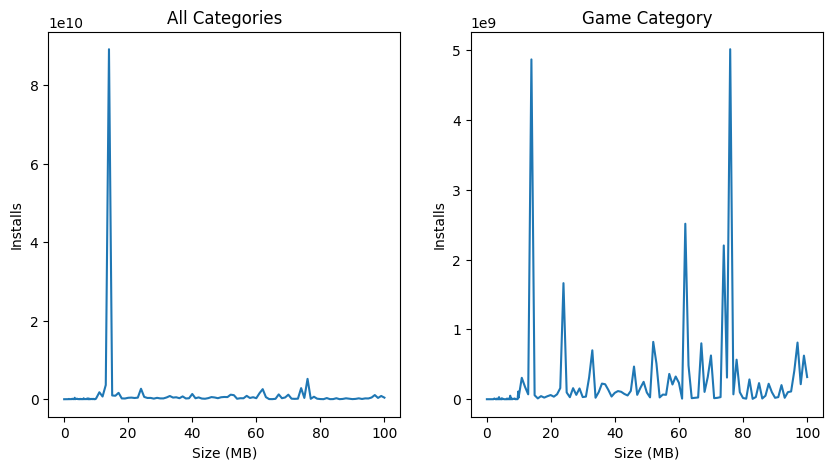

In [31]:
# Create line chart 
# Group data by size
grouped = play_store_df.groupby('Size')['Installs'].sum()

# Filter data by category
game_df = play_store_df[play_store_df['Category'] == 'GAME']
game_grouped = game_df.groupby('Size')['Installs'].sum()

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot line chart for all categories
ax1.plot(grouped.index, grouped.values)
ax1.set_xlabel('Size (MB)')
ax1.set_ylabel('Installs')
ax1.set_title('All Categories')

# Plot line chart for Game category
ax2.plot(game_grouped.index, game_grouped.values)
ax2.set_xlabel('Size (MB)')
ax2.set_ylabel('Installs')
ax2.set_title('Game Category')

plt.show()

##### 1. Why did you pick the specific chart?

The specific chart used is a line chart that shows the relationship between app size and the number of installs for all categories and the Game category specifically. This chart was chosen because it allows us to identify patterns and trends in the data and determine whether there is a correlation between app size and the number of installs.

#####2. What is/are the insight(s) found from the chart?

The insights gained from the chart are as follows:

>For all categories, the line chart shows that the number of installs is highest for apps that are less than 20 MB in size, with the number of installs decreasing as app size increases. This suggests that there is a preference among users for smaller apps that take up less storage space on their devices.

>Within the Game category, the line chart shows that the number of installs is highest for apps that are around 80 MB in size, with a second spike in installs for apps that are less than 20 MB in size. This suggests that there may be a preference among users for larger game apps that offer more features and functionality, but also a preference for smaller game apps that take up less storage space on their devices.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the line chart can help in making informed decisions about app development and create high-quality apps that meet the needs of target audience and bring more user engagement.

#### Chart - 5(Pie Chart)- Breakdown of Paid and Free Apps by Number and Total Installs

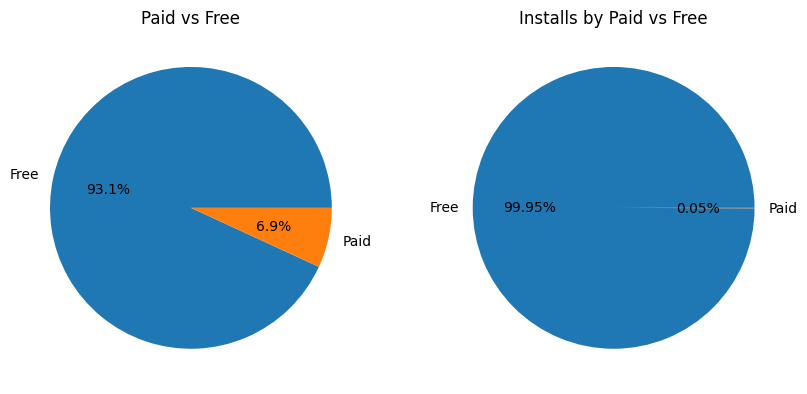

In [32]:
# Group data by type
grouped = play_store_df.groupby('Type').size()

# Group data by type and calculate total installs
grouped_installs = play_store_df.groupby('Type')['Installs'].sum()

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot pie chart for app type
pie1 = ax1.pie(grouped, labels=grouped.index, autopct='%1.1f%%')
ax1.set_title('Paid vs Free')

# Plot pie chart for installs by app type
pie2 = ax2.pie(grouped_installs, labels=grouped_installs.index, autopct='%1.2f%%')
ax2.set_title('Installs by Paid vs Free')

plt.show()

####1.Why did you pick the specific chart?

Pie charts are a good choice for showing the relative proportions or percentages of different categories or groups. In this case, the pie charts are used to display the distribution of apps and installs by type (paid vs free), which is a categorical variable. The pie charts make it easy to see the relative proportions of each type of app and installs, and highlight any differences between paid and free apps.

#####2. What is/are the insight(s) found from the chart?

From the first pie chart, it can be seen that the majority of apps in the Google Play Store are free (93.1%), while only a small percentage are paid (6.9%). This suggests that there is a strong preference among users for free apps, and that new companies launching a new app may want to consider offering a free version of their app to increase adoption.

From the other pie chart, we can see that free apps has majority of overall installs (99.95%). Whereas paid apps account for a small portion of installs (0.05%). This suggests that users prefer free apps, there is a small market for paid apps, and if organisation want to generate revenue through paid apps then they have to offer unique or high-quality features.

####3.Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from these charts can potentially help create a positive business impact for a company launching a new app. By understanding the distribution of apps and installs in terms of paid vs free, companies can make informed decisions about whether to offer a free or paid version of their app, and can tailor their marketing and pricing strategies accordingly.

However, there are also potential risks associated with offering a free app. For example, companies may struggle to generate revenue from a free app, and may need to rely on in-app advertising or other monetization strategies. Additionally, offering a free app may increase competition and make it more difficult to stand out in a crowded market. Companies should carefully consider the pros and cons of offering a free app before making a decision.

#### Chart - 6(Stacked Bar Chart)-Distribution of Content Ratings by App Category

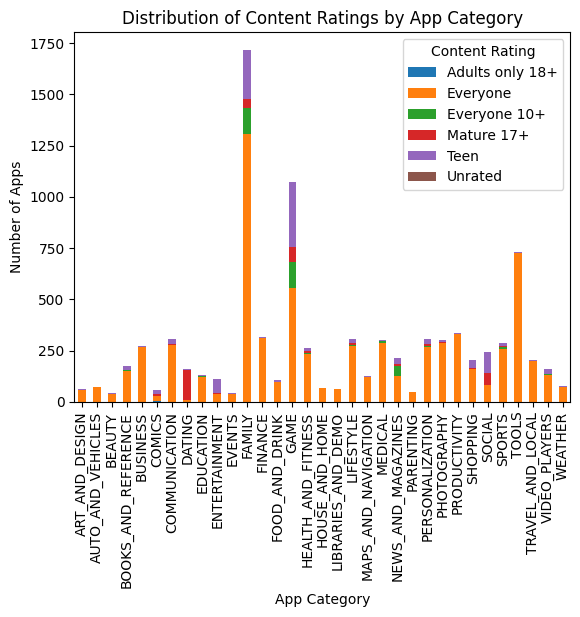

In [33]:
# Group data by category and content rating
grouped = play_store_df.groupby(['Category', 'Content Rating']).size().reset_index(name='Count')

# Pivot data to create stacked bar chart
pivot = grouped.pivot(index='Category', columns='Content Rating', values='Count')
pivot = pivot.fillna(0)

# Create stacked bar chart
pivot.plot(kind='bar', stacked=True)

# Set chart title and axis labels
plt.title('Distribution of Content Ratings by App Category')
plt.xlabel('App Category')
plt.ylabel('Number of Apps')

plt.show()

####1.Why did you pick the specific chart?

A stacked bar chart is a good choice for displaying the distribution of a categorical variable across multiple groups or categories, especially when the data can be broken down into subcategories. In this case, the stacked bar chart is used to show the distribution of content ratings across different app categories, allowing us to see how content ratings vary across different types of apps.

#####2. What is/are the insight(s) found from the chart?

From the chart, we can see that most app categories have a high proportion of apps with a 'Everyone' content rating, which indicates that the app is suitable for all ages. However, there are some categories, such as 'Dating' and 'Social'  that have a higher proportion of apps with a 'Mature 17+' content rating. This suggests that these categories may have more mature or adult-oriented content. Therefore, companies launching a new app should consider the appropriateness of their content and the potential impact on their target audience.

####3.Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from this chart can help create a positive business impact for a new company launching a new app. By understanding the distribution of content ratings by app category, companies can ensure that their app content is appropriate for their target audience and avoid any potential negative impact on their brand or reputation.

However, there is also a potential risk associated with the insights gained from this chart. If a company launches an app with content that is not appropriate for its target audience, it may receive negative reviews and ratings, which could lead to decreased adoption and growth. Therefore, it is important for companies to carefully consider the appropriateness of their content and the potential impact on their target audience before launching a new app.

# Sentiment Analysis

In [34]:
# Reading the User Review dataset and storing it in variable
users_review_df = pd.read_csv('/content/drive/MyDrive/alma_better/capstone_project1/User Reviews.csv')

In [35]:
users_review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [36]:
# Clean the dataset by removing N/A
users_review_df.dropna(inplace = True)

In [37]:
users_review_df.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [38]:
users_review_df

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000
64227,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000


In [39]:
# Merge both the Datasets with the inner join
merged_df = pd.merge(play_store_df, users_review_df, on='App', how='inner')

In [40]:
merged_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [41]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59124 entries, 0 to 59123
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     59124 non-null  object 
 1   Category                59124 non-null  object 
 2   Rating                  59124 non-null  float64
 3   Reviews                 59124 non-null  int64  
 4   Size                    59124 non-null  float64
 5   Installs                59124 non-null  float64
 6   Type                    59124 non-null  object 
 7   Price                   59124 non-null  float64
 8   Content Rating          59124 non-null  object 
 9   Genres                  59124 non-null  object 
 10  Last Updated            59124 non-null  object 
 11  Current Ver             59124 non-null  object 
 12  Android Ver             59124 non-null  object 
 13  Translated_Review       59124 non-null  object 
 14  Sentiment               59124 non-null

In [42]:
merged_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250000,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725000,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500000,0.600000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I hate,Negative,-0.800000,0.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59119,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,14.0,10000000.0,Free,0.0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,Overall great app. Best gallery seen far,Positive,0.475000,0.512500
59120,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,14.0,10000000.0,Free,0.0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,"Recommended, 100% love it, keep good work dev ...",Positive,0.566667,0.733333
59121,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,14.0,10000000.0,Free,0.0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,Too much ads,Positive,0.200000,0.200000
59122,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,14.0,10000000.0,Free,0.0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,Just allow time ...,Neutral,0.000000,0.000000


#### Chart - 7(Pie Chart)-Sentiment Analysis

Sentiment
Negative    15041
Neutral      6560
Positive    37523
Name: App, dtype: int64


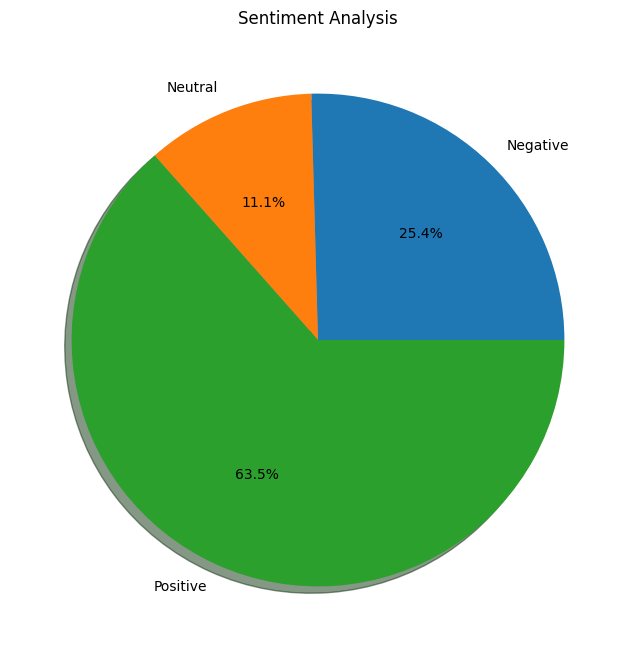

In [43]:
# Group the data by sentiment and count the number of rows for each sentiment
sentiments_total = merged_df.groupby(['Sentiment'])['App'].count()
print(sentiments_total)

# Create a pie chart of the sentiment counts
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(sentiments_total.values, labels=sentiments_total.index,shadow = True, autopct='%1.1f%%')

# Set the chart title
ax.set_title('Sentiment Analysis')

# Display the chart
plt.show()

####1.Why did you pick the specific chart?

A pie chart is a good choice for displaying the distribution of a categorical variable, such as sentiment, across different categories or groups. In this case, the pie chart is used to show the distribution of sentiment across all app reviews, allowing us to see the overall sentiment of users towards the apps.

#####2. What is/are the insight(s) found from the chart?

From the chart, we can see that the majority of app reviews are positive (63.5%), followed by neutral (25.4%) and negative (11.1%). This suggests that the majority of users have a positive sentiment towards the apps, and that companies launching a new app should strive to create a positive user experience to increase adoption and growth.

####3.Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from this chart can help create a positive business impact for a company launching a new app. By analysing the sentiment of users, companies can find the potential areas for improvement or innovation to create a positive user experience and increase the probabilty to stay ahead from the competition. Additionally, companies can use this information to identify common themes or topics in positive reviews to highlight the strengths of their app and differentiate themselves from competitors.

However, there is also a potential risk associated with negative sentiment towards the apps. If a significant proportion of reviews are negative, it may indicate that users are dissatisfied with the app and may lead to decreased adoption and growth. Therefore, it is important for companies to closely monitor user sentiment and address any issues or concerns that may arise to maintain a positive user experience and ensure long-term growth.

#### Chart - 8(Joint Plot)-Sentiment Polarity vs Sentiment Subjectivity

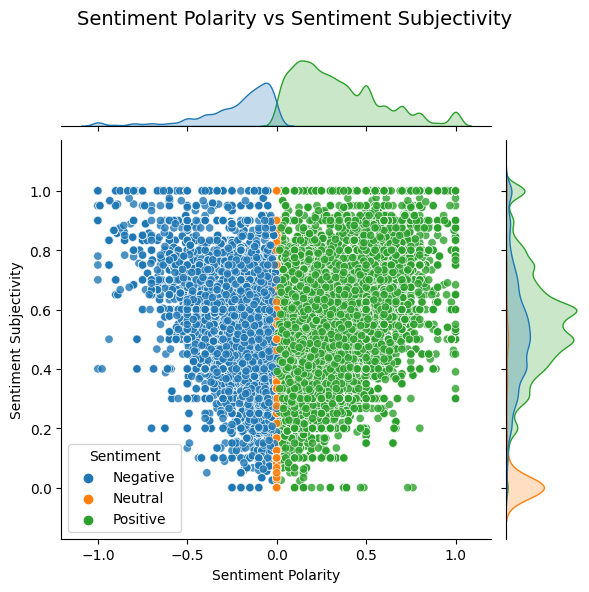

In [44]:
# Create a joint plot of sentiment polarity vs sentiment subjectivity
sns.jointplot(data=merged_df, x='Sentiment_Polarity', y='Sentiment_Subjectivity', hue='Sentiment', alpha=0.8)

# Set the chart title and axis labels
plt.subplots_adjust(top=0.9)
plt.suptitle('Sentiment Polarity vs Sentiment Subjectivity', fontsize=14)
plt.xlabel('Sentiment Polarity')
plt.ylabel('Sentiment Subjectivity')

# Display the plot
plt.show()

####1.Why did you pick the specific chart?

The joint plot was chosen because it is a useful visualization for exploring the relationship between two continuous variables, sentiment polarity and sentiment subjectivity, and how they are related to each other across different sentiment categories.

#####2. What is/are the insight(s) found from the chart?

The gain insight suggests that sentiment polarity and subjectivity are interdependent, and that the relationship between them is more complex than a linear correlation. The clustering of neutral sentiment in the bottom center of the plot suggests that most neutral comments are objective in nature, while positive and negative comments are more likely to be subjective.

####3.Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the joint plot can help inform decision-making and potentially lead to a positive business impact. For example, identifying the specific features or aspects of the user experience that are particularly well-received by users based on positive reviews can inform future product development and marketing efforts. Similarly, identifying areas for improvement in the app based on negative reviews can help prioritize development efforts to improve user satisfaction and retention.

It is possible that the insights gained from the joint plot could lead to negative growth if the identified areas for improvement are not addressed or if the app's development or marketing efforts are not aligned with user needs and preferences.

#### Chart - 9(Heatmap)- Correlation Heatmap

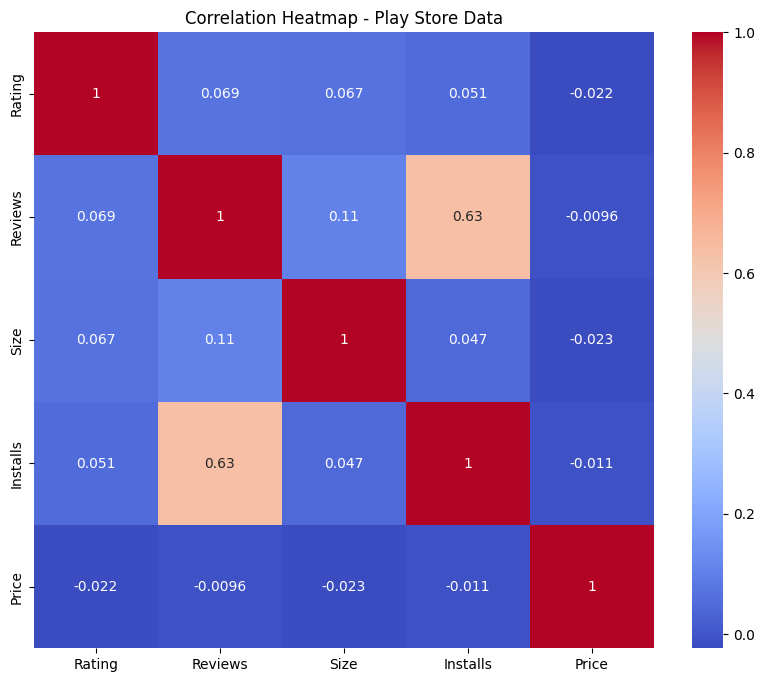

In [45]:
# Select the columns to include in the correlation analysis
columns_for_heatmap = ['Rating', 'Reviews', 'Size', 'Installs', 'Price']

# Compute the pairwise correlation between columns
corr = play_store_df[columns_for_heatmap].corr()

# Create a heatmap of the correlation matrix
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Set the chart title
ax.set_title('Correlation Heatmap - Play Store Data')

# Display the chart
plt.show()

####1.Why did you pick the specific chart?

The correlation heatmap was chosen because it is a useful visualization for exploring the pairwise correlations between variables in a dataset. By examining the strength and direction of the correlations, it is possible to identify relationships between variables and potentially make predictions or inform decision-making.

#####2. What is/are the insight(s) found from the chart?

The correlation heatmap with variables such as Rating, Reviews, Size, Installs, and Price provides several insights into the relationships between these variables. For example, the heatmap shows that there is a strong positive correlation between the number of Reviews and the number of Installs, which suggests that apps with more reviews tend to have more installs.The heatmap also shows a slightly negative correlation between Price and Rating, which means that apps with higher prices more likely to have lower ratings.

Other insights include that Reviews and Installs are positively correlated with Size, although the correlation is weaker than it is for Reviews and Installs. There is a weak negative correlation between Price and Reviews, indicating that higher-priced apps tend to have fewer reviews. Size and Price are weakly correlated, indicating that larger apps tend to be more expensive.

#### Chart - 10- Pair Plot

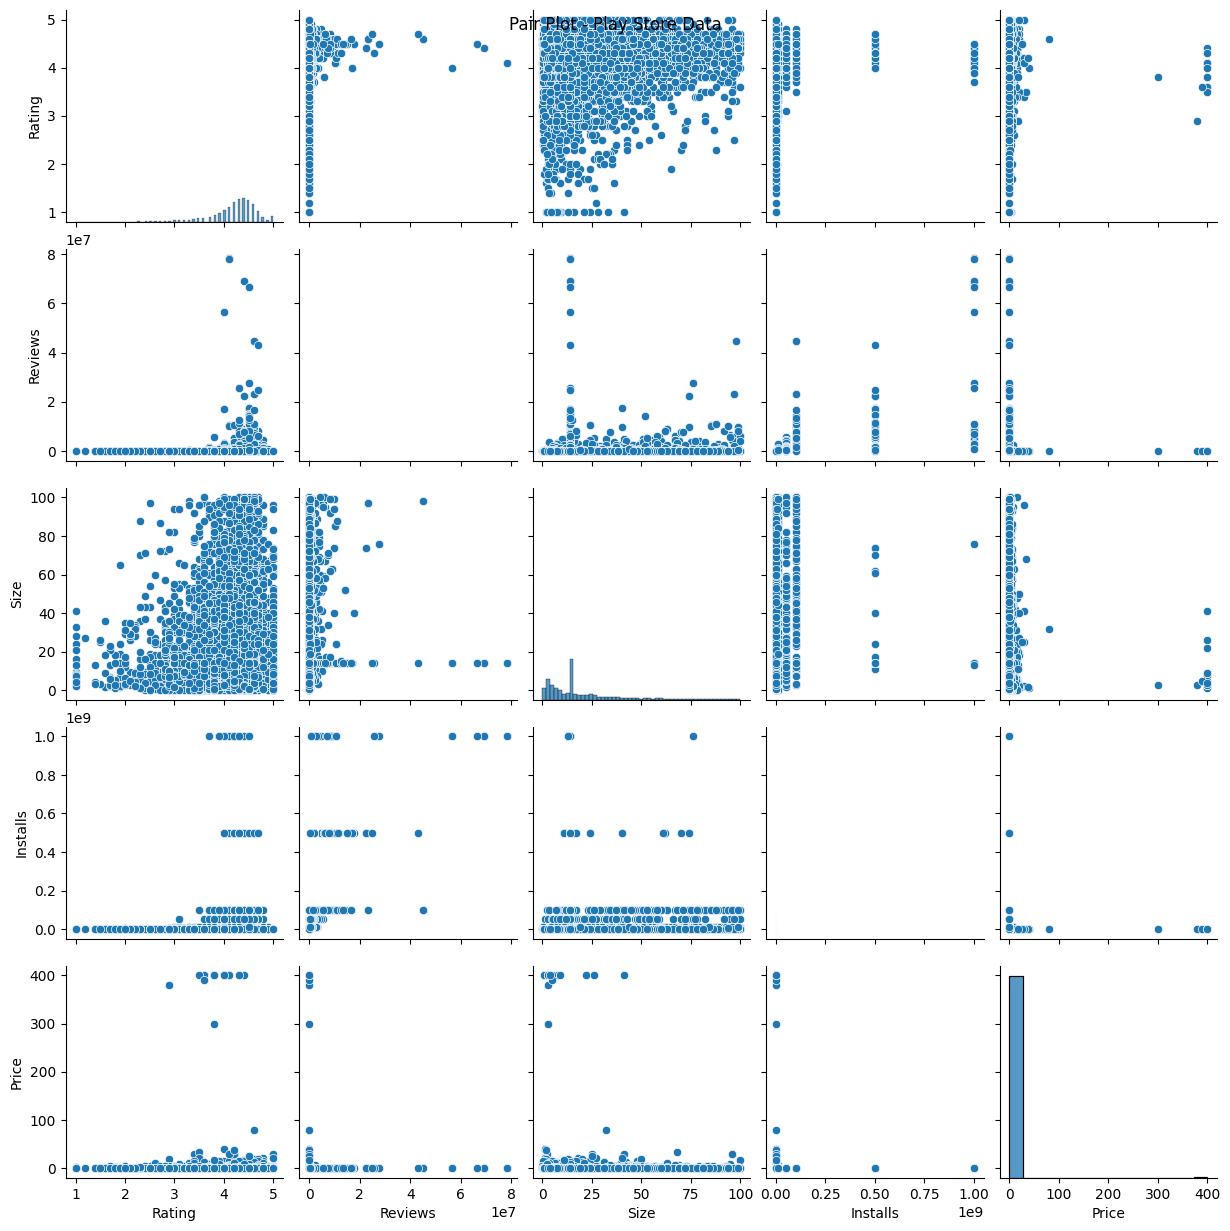

In [46]:
# Select the columns to include in the pair plot
columns_for_pairplot = ['Rating', 'Reviews', 'Size', 'Installs', 'Price']

# Create the pair plot
sns.pairplot(play_store_df[columns_for_pairplot])

# Set the chart title
plt.suptitle('Pair Plot - Play Store Data')

# Display the chart
plt.show()

##### 1. Why did you pick the specific chart?

The pair plot was chosen because it is a useful visualization for exploring the pairwise relationships between multiple variables in a dataset. By examining the scatterplots and histograms for each pair of variables, it is possible to identify patterns and relationships in the data.

##### 2. What is/are the insight(s) found from the chart?

The pair plot with variables such as Rating, Reviews, Size, Installs, and Price provides several insights into the relationships between these variables. For example, the scatterplot between Reviews and Installs shows a positive linear relationship, suggesting that apps with more reviews also tend to have more installs. The scatterplot between Rating and Price shows a weak negative relationship, suggesting that apps with higher prices tend to have lower ratings.

Other insights include that Reviews and Installs have a positive relationship with Size, although the relationship is weaker than it is for Reviews and Installs. There is a weak negative relationship between Price and Reviews, indicating that higher-priced apps tend to have fewer reviews. Size and Price also have a weak negative relationship, indicating that larger apps are slightly more likely to be less expensive.

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.

Suggestions that will be helpful for organizations looking to launch new apps in the market are:-

>Focus on developing high-quality apps: The project insights suggest that high-quality apps with positive reviews and ratings tend to be more successful. Therefore, it is important for organizations to focus on developing apps that provide value to customers and meet their needs.

>Consider pricing strategies carefully: The project insights suggest that there is a strong preference among users for free apps, with paid apps accounting for only a small portion of installs. Organizations should consider their target market and the value that their app provides when setting their pricing strategy.

>Pay attention to app size: The project insights suggest that users prefer smaller apps that take up less storage space on their devices. Therefore, organizations should consider the size of their app when developing and optimizing it for the Play Store.

>Identify gaps in the market: The project insights suggest that certain categories, such as Games and Family, are more popular than others. Organizations should identify gaps in the market where there is a need for new or improved apps and develop apps to fill these gaps.

>Consider the appropriateness of content: The project insights suggest that some categories, such as 'Dating' and 'Social', have more mature or adult-oriented content. Therefore, companies launching a new app should consider the appropriateness of their content and the potential impact on their target audience.

>Strive to create a positive user experience: The project insights suggest that the majority of users have a positive sentiment towards apps. Therefore, organizations should strive to create a positive user experience to increase adoption and growth.

>Monitor and respond to customer feedback: The project insights suggest that user reviews are an important factor in app success. Organizations should monitor customer feedback and respond to complaints or issues promptly to increase customer satisfaction.

Overall, by considering the insights gained from the project and implementing these suggestions, organizations can increase their chances of developing successful and profitable apps on the Play Store.

# **Conclusion**

>App category, ratings, and installs are key factors that influence app success on the Play Store.

>User reviews provide valuable insights into the user experience and can be used to improve the overall quality and user satisfaction of apps.

>High-quality apps with positive reviews and ratings tend to be more successful.

>Most of the users prefer free apps that offer in-app purchases rather than paid apps.

>Users prefer smaller apps that take up less storage space on their devices.

>Most apps are designed to be accessible and enjoyable for a wide range of users. Therefore most of the apps have content that's suitable for everyone.